<a href="https://colab.research.google.com/github/hksantosh/eip/blob/master/week2/ninth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import numpy as np

from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import utils

from tensorflow.keras.datasets import mnist

from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


(60000, 28, 28)


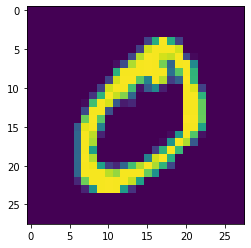

In [196]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

In [200]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [201]:
model = Sequential()
 
model.add(Convolution2D(16, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, activation='relu', use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) #24
model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(32, 3, activation='relu', use_bias=False)) #10
model.add(BatchNormalization())
model.add(Dropout(0.1))

#model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) #20
#model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu', use_bias=False))  #10
model.add(MaxPooling2D(pool_size=(2, 2)))  #5

model.add(Convolution2D(32, 3, activation='relu', use_bias=False)) #3
model.add(BatchNormalization())
model.add(Dropout(0.1))

#model.add(Convolution2D(32, 3, activation='relu', use_bias=False)) #3
#model.add(BatchNormalization())
#model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, activation='relu', use_bias=False)) #1
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_291 (Conv2D)          (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_215 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_215 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_292 (Conv2D)          (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_216 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_216 (Dropout)        (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_293 (Conv2D)          (None, 24, 24, 10)      

In [202]:
def scheduler(epoch, lr):
  return round(0.001 * 1/(1 + 0.319 * epoch), 10)

callbacks = [
  ModelCheckpoint(filepath='wk2_ninth.h5', save_best_only=True, monitor='val_accuracy', verbose=1),
  LearningRateScheduler(scheduler, verbose=1)
]

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0015.
Epoch 1/20
59712/60000 [============================>.] - ETA: 0s - loss: 0.5346 - accuracy: 0.8587
Epoch 00001: val_accuracy improved from -inf to 0.98000, saving model to wk2_ninth.h5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.5335 - accuracy: 0.8590 - val_loss: 0.1044 - val_accuracy: 0.9800

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0011372252.
Epoch 2/20
59712/60000 [============================>.] - ETA: 0s - loss: 0.3237 - accuracy: 0.9115
Epoch 00002: val_accuracy improved from 0.98000 to 0.98330, saving model to wk2_ninth.h5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.3232 - accuracy: 0.9115 - val_loss: 0.0745 - val_accuracy: 0.9833

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0009157509.
Epoch 3/20
59744/60000 [============================>.] - ETA: 0s - loss:

In [0]:
### Score for the best model
score = models.load_model('wk2_ninth.h5').evaluate(X_test, Y_test, verbose=0)
print(score)